In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk

In [2]:
# data loader
data_arr = []
with open('data5.txt', 'r') as f:
    # used to identify which attribute it is
    i = 0
    
    # hold current entry and the attribute names
    entry = dict()
    columns = ['flair', 'title', 'selftext', 'date', 'c1', 'c2', 'c3', 'sub_id', 'date_raw', 'permalink']
    
    # read file to create list of dicts
    for line in f:
        # convert date to int
        if i == 8:
            entry[columns[i]] = int(line[:-3])
        else:
            entry[columns[i]] = " ".join(line[:-1].split())
        i+=1
        
        # at end of one entry, add to data array
        # and reset entry counter
        if i == 10:
            data_arr.append(entry)
            entry = dict()
            i = 0

# To check loaded data
print(data_arr[0])
print(data_arr[1])
print(data_arr[2])

{'flair': 'Politics', 'title': 'IndiaJapan Ties Can Help Develop Techs for PostCOVID World PM', 'selftext': '', 'date': '2020-04-10 20:59:12', 'c1': 'Bye Bye make in India Oh ya You never existed', 'c2': 'Bullet train 🚉', 'c3': '', 'sub_id': 'fyhxfi', 'date_raw': 1586532552, 'permalink': 'https://www.reddit.com/r/india/comments/fyhxfi/indiajapan_ties_can_help_develop_techs_for/'}
{'flair': 'Politics', 'title': 'Drone Films Indian Artillery Pounding Pak Army In Keran Today', 'selftext': '', 'date': '2020-04-10 21:04:24', 'c1': '', 'c2': '', 'c3': '', 'sub_id': 'fyi0zo', 'date_raw': 1586532864, 'permalink': 'https://www.reddit.com/r/india/comments/fyi0zo/drone_films_indian_artillery_pounding_pak_army_in/'}
{'flair': 'Coronavirus', 'title': 'Covid In wake of SC order private labs urge govt to reimburse testing costs', 'selftext': '', 'date': '2020-04-10 21:13:34', 'c1': 'Mudiji PMCARES mei se thoda idhar dedona', 'c2': '', 'c3': '', 'sub_id': 'fyi7eo', 'date_raw': 1586533414, 'permalink':

In [3]:
# see the head of the data
df = pd.DataFrame(data_arr)
df.head()

,c1,c2,c3,date,date_raw,flair,permalink,selftext,sub_id,title
0,Bye Bye make in India Oh ya You never existed,Bullet train 🚉,,2020-04-10 20:59:12,1586532552,Politics,https://www.reddit.com/r/india/comments/fyhxfi...,,fyhxfi,IndiaJapan Ties Can Help Develop Techs for Pos...
1,,,,2020-04-10 21:04:24,1586532864,Politics,https://www.reddit.com/r/india/comments/fyi0zo...,,fyi0zo,Drone Films Indian Artillery Pounding Pak Army...
2,Mudiji PMCARES mei se thoda idhar dedona,,,2020-04-10 21:13:34,1586533414,Coronavirus,https://www.reddit.com/r/india/comments/fyi7eo...,,fyi7eo,Covid In wake of SC order private labs urge go...
3,Every time I come to this thread I realise how...,मेरी पूजनीय माताजी और आप सब की बड़ी बहन के आशी...,Goodnight imma cry myself to sleep now,2020-04-10 21:15:03,1586533503,Scheduled,https://www.reddit.com/r/india/comments/fyi8g2...,Beep Boop Bot I am a bot if any problem askawa...,fyi8g2,Late Night Random Discussion Thread
4,What if coronavirus hit at times of Mahabharata,What s wrong with the print,What if coronavirus crisis had hit under Vajpa...,2020-04-10 21:15:43,1586533543,Coronavirus,https://www.reddit.com/r/india/comments/fyi8xd...,,fyi8xd,What if coronavirus crisis had hit India under...


In [4]:
# Information got:
"""
Datatype:
title: text
selftext: text
permalink: html link
flair:  text
date_raw: int (unix timestamp)
date: date
c1,c2,c3: top level comment 1, 2 and 3 of type text
"""

'\nDatatype:\ntitle: text\nselftext: text\npermalink: html link\nflair:  text\ndate_raw: int (unix timestamp)\ndate: date\nc1,c2,c3: top level comment 1, 2 and 3 of type text\n'

In [5]:
# Check for duplicates and if found
# drop them
df[df.duplicated() == True].count()
#df = df.drop_duplicates()

c1           0
c2           0
c3           0
date         0
date_raw     0
flair        0
permalink    0
selftext     0
sub_id       0
title        0
dtype: int64

In [6]:
# Finding types of labels
unique_flair = df['flair'].unique()
print(unique_flair)
print(len(unique_flair))

['Politics' 'Coronavirus' 'Scheduled' 'Non-Political' 'AskIndia'
 'CAA-NRC-NPR' 'Business/Finance' 'Unverified' 'Policy/Economy' 'Food'
 'Unverified - Opinion' 'Photography' 'Science/Technology' 'Sports'
 'Announcement' '| Repost |' 'Translation provided in comments'
 'Post link Directly' 'Old' 'Megathread' 'Meta.'
 '| Unverified Content / Disreputed Source |' '| Social Media Rules |'
 'Policy/Economy [Megathread]' 'Politics [Megathread]' 'Opinion'
 'AMA has Ended' 'Shitpost' 'Demonetization' '| Custom (Informed OP) |'
 'CAA-NRC' 'PARTAYYY AGAIN :D' 'Unverified - NSFL' 'Happy Birthday OP!'
 '| Stickied Topic |' 'Repost' '| Not specific to India |' 'Verified'
 'Politics [18 Dec 2019]' 'None' 'AMA Announcement' 'DST'
 '| Not in English | | Not Original/Relevant Title |'
 'Politics [Aug 2009]' 'AMA' 'AMA / Unverified'
 "Politics (word is: 'azadi')" '| Not in English |' 'Foodpolitics'
 'Casual AMA' 'Aug 2019 - Politics' 'Politics - Old' 'Moderated'
 'AMA has ended' 'Politics (Translation i

In [7]:
# Information got:
"""
I had checked for some kinds of post removals while scraping data,
but a lot of extra flairs still ended in the data, need to delete rows
containing unecessary flairs.
Also I think that flairs with | | are obviously violation of the subreddit rules
Flairs this will run for are (Currently valid flairs on r/india:
Politics
Non-Political
AskIndia
Policy/Economy
Business/Finance
Science/Technology
Scheduled
Sports
Food
Photography
CAA-NRC-NPR
Coronavirus
"""
# Action taken:
"""
Drop rows having invalid flairs
"""

'\nDrop rows having invalid flairs\n'

In [8]:
# Clean data to get only desired labels

# select rows having valid flairs
valid_flairs = ['Politics', 'Non-Political', 'AskIndia', 'Policy/Economy','Business/Finance','Science/Technology', 'Scheduled', 'Sports', 'Food','Photography','CAA-NRC-NPR', 'Coronavirus']
df = df[df['flair'].isin(valid_flairs)]

# get unique entries in column flair
unique_flair = df['flair'].unique()

print('Unique flairs: ', unique_flair)
print('Number of unique flairs: ', len(unique_flair))

Unique flairs:  ['Politics' 'Coronavirus' 'Scheduled' 'Non-Political' 'AskIndia'
 'CAA-NRC-NPR' 'Business/Finance' 'Policy/Economy' 'Food' 'Photography'
 'Science/Technology' 'Sports']
Number of unique flairs:  12


In [9]:
# Find number of null values in each column
df.isnull().sum()

c1           0
c2           0
c3           0
date         0
date_raw     0
flair        0
permalink    0
selftext     0
sub_id       0
title        0
dtype: int64

/usr/lib64/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


flair: 0 of 126854 entries
title: 31 of 126854 entries
selftext: 102588 of 126854 entries
date: 0 of 126854 entries
c1: 52954 of 126854 entries
c2: 70653 of 126854 entries
c3: 82712 of 126854 entries
sub_id: 0 of 126854 entries
date_raw: 0 of 126854 entries
permalink: 0 of 126854 entries


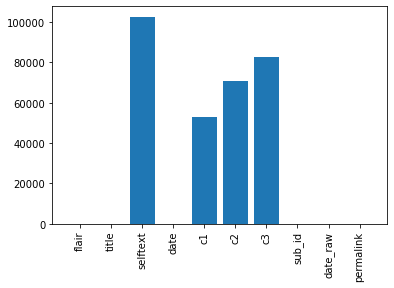

In [10]:
# find number of '' in each column
empty_strings = dict()

# iterate over columns and save no of entries that are ''
for i in columns:
    empty_strings[i] = (df[i] == '').sum()

# pretty print the result
for i in empty_strings:
    print(i, end=": ")
    print(empty_strings[i], end="")
    print(" of {} entries".format(df.shape[0]))
    
# Plot the result as a bar chart
values = [empty_strings[x] for x in columns]
plt.bar(np.arange(len(columns)), values)
plt.xticks(np.arange(len(columns)), columns, rotation=90)
plt.show()

In [11]:
# Information got:
"""
1. some titles are empty, this has happened due to processing text while scraping:
The title may have been purely numeric,
it can also be just a html link,
a username, or a subreddit name,
or just special characters
the title had no alphabets
2. A lot of selftext is empty, this can be due to:
Only a image, html link as the body,
no alphabets in the post
3. Number of empty top level comments follow expected pattern
number of empty: top level 1 < top level 2 < top level 3
4. Other columns are fine
5. While some reliance on other columns can help, title seems the most useful
"""
# Actions taken
"""
1. Remove all rows having no title
"""

'\n1. Remove all rows having no title\n'

In [12]:
# Remove rows having no title
df = df[df['title'] != '']

Politics: 37836 of 126823
Non-Political: 35061 of 126823
AskIndia: 19195 of 126823
Policy/Economy: 7667 of 126823
Business/Finance: 10118 of 126823
Science/Technology: 6465 of 126823
Scheduled: 814 of 126823
Sports: 2807 of 126823
Food: 1579 of 126823
Photography: 2147 of 126823
CAA-NRC-NPR: 44 of 126823
Coronavirus: 3090 of 126823


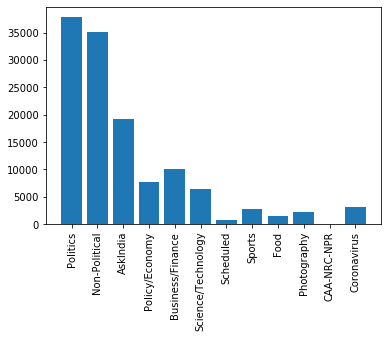

In [13]:
# Count no of data points under all labels
# hold label counts
label_count = []
for i in valid_flairs:
    label_count.append((df['flair'] == i).sum())

# Pretty print the data
for i, j in enumerate(valid_flairs):
    print("{}: ".format(j), end='')
    print(label_count[i], end='')
    print(" of {}".format(df.shape[0]))
    
# Plot as bar chart
plt.bar(np.arange(len(valid_flairs)), label_count)
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.show()

In [14]:
# TODO
# Information got:
"""
1. Some labels dominate the dataset while very little data is available for others
i.e. dataset is imbalanced
Techniques to balance the dataset need to be used
2. Flairs other than Coronavirus, CAA-NRC-NPR and Scheduled can be boosted by 
scraping more data from the past, as Coronavirus and CAA-NRC-NPR are 'events'
and very little data is available for flair scheduled
3. Flair Coronavirus and CAA-NRC-NPR can be boosted by scraping newer posts
4. Amount of data for CAA-NRC-NPR is meagre, need to somehow deal with this
"""
# Action taken
"""
Todo: boost some labels,
learn about methods to work with imbalanced datasets
Improve caa-nrc-npr situation
"""
# Update (eda 2)
"""
I boosted coronavirus to 3090 by scraping more recent data
caa-nrc-npr got boosted a little, still not as good
Askindia, Politics, Non-Political and Coronavirus dominate dataset now
"""

'\nI boosted coronavirus to 3090 by scraping more recent data\ncaa-nrc-npr got boosted a little, still not as good\nAskindia, Politics, Non-Political and Coronavirus dominate dataset now\n'

In [55]:
# Count no of words in text columns

# hold lengths of each entry in attribute
title_word_len = []
c1_word_len = []
c2_word_len = []
c3_word_len = []
selftext_word_len = []

# map flairs to indices
index_for_flair = dict()
for i, j in enumerate(valid_flairs):
    index_for_flair[j] = i

# hold entry lengths by flair, with 
# saved in lists according to their mapping
title_len_by_flair = [[] for i in range(12)]
selftext_len_by_flair = [[] for i in range(12)]


# for each row, get length of desired attribute
# and append in respective list
for index, row in df.iterrows():
    title_word_len.append(len(row['title'].split()))
    c1_word_len.append(len(row['c1'].split()))
    c2_word_len.append(len(row['c2'].split()))
    c3_word_len.append(len(row['c3'].split()))
    selftext_word_len.append(len(row['selftext'].split()))
    
    # append in sublist according to mapping
    title_len_by_flair[index_for_flair[row['flair']]].append(title_word_len[-1])
    selftext_len_by_flair[index_for_flair[row['flair']]].append(selftext_word_len[-1])

# pretty print
print('title max:{} min:{} avg:{}'.format(max(title_word_len), min(title_word_len), sum(title_word_len)/len(title_word_len)))
print('c1 max:{} min:{} avg:{}'.format(max(c1_word_len), min(c1_word_len), sum(c1_word_len)/len(c1_word_len)))
print('c2 max:{} min:{} avg:{}'.format(max(c2_word_len), min(c2_word_len), sum(c2_word_len)/len(c2_word_len)))
print('c3 max:{} min:{} avg:{}'.format(max(c3_word_len), min(c3_word_len), sum(c3_word_len)/len(c3_word_len)))
print('selftext max:{} min:{} avg:{}'.format(max(selftext_word_len), min(selftext_word_len), sum(selftext_word_len)/len(selftext_word_len)))
ju = 0
for i in selftext_word_len:
    if i == 0:
        ju +=1
print(ju)

title max:62 min:1 avg:11.658736979885353
c1 max:1880 min:0 avg:35.02233821940815
c2 max:1818 min:0 avg:19.955173746087066
c3 max:1703 min:0 avg:13.267727462684213
selftext max:4644 min:0 avg:24.373757126073347
102558


In [16]:
# Information got:
"""
Max number of words in a title ~62
This is useful info, but I think a frequency line
plot will be much more useful
I expect a gaussian result
"""
# Information found elsewhere:
"""
Reddit has title length limit 300 chars
Selftext ~10k-40k
comments ~10k
"""

'\nReddit has title length limit 300 chars\nSelftext ~10k-40k\ncomments ~10k\n'

freq array title:  [0, 585, 1827, 3167, 4503, 5805, 7010, 8157, 9606, 10929, 11608, 11130, 9825, 8264, 6731, 5533, 4331, 3365, 2459, 1802, 1438, 1002, 768, 631, 581, 445, 442, 398, 334, 306, 270, 241, 256, 224, 242, 194, 198, 198, 192, 156, 153, 161, 143, 152, 166, 126, 109, 114, 113, 83, 88, 64, 40, 31, 26, 25, 27, 17, 18, 6, 6, 1, 1]


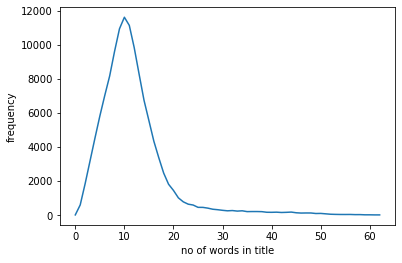

In [17]:
# no of words in title vs frequency

# generate frequency array for title
freq_arr_title = [0 for i in range(0, max(title_word_len)+1)]
for i in title_word_len:
    freq_arr_title[i] += 1
print('freq array title: ', freq_arr_title)

plt.xlabel('no of words in title')
plt.ylabel('frequency')
plt.plot(np.arange(0, max(title_word_len)+1), freq_arr_title)

In [18]:
# find no of posts having title greater than value
for i in range(25, 70, 5):
    print('greater than {}: '.format(i), end='')
    print(sum(freq_arr_title[i:]))
print('less than 25: {}'.format(sum(freq_arr_title[:25])))
print('total:', sum(freq_arr_title))

greater than 25: 5766
greater than 30: 3841
greater than 35: 2608
greater than 40: 1670
greater than 45: 895
greater than 50: 350
greater than 55: 101
greater than 60: 8
greater than 65: 0
less than 25: 121057
total: 126823


In [19]:
# Information got:
"""
Only ~6k of 1.25 lakh posts have titles greater than 25 words
Very less titles have words more than 50
"""
# Inference:
"""
Can use less number of words in title
"""

'\nCan use less number of words in title\n'

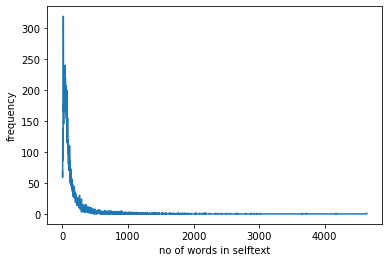

In [20]:
# no of words in selftext vs frequency

# generate frequency array for selftext
freq_arr_selftext = [0 for i in range(0, max(selftext_word_len)+1)]
for i in selftext_word_len:
    freq_arr_selftext[i] += 1

plt.xlabel('no of words in selftext')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(selftext_word_len)+1), freq_arr_selftext[1:])

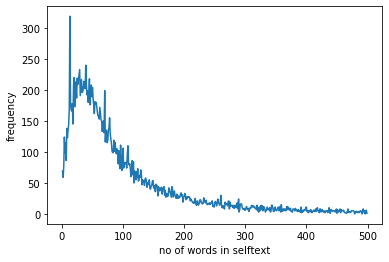

In [21]:
# no of words in selftext vs frequency
# only till 500 as others are mostly zero
plt.xlabel('no of words in selftext')
plt.ylabel('frequency')
plt.plot(np.arange(1, 500), freq_arr_selftext[1:500])

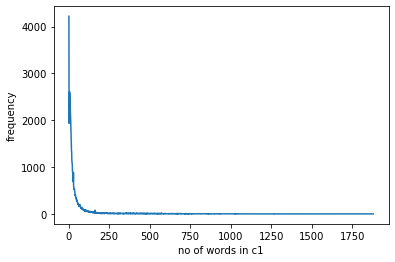

In [22]:
# no of words in c1 vs frequency
# generate frequency array for c1
freq_arr_c1 = [0 for i in range(0, max(c1_word_len)+1)]
for i in c1_word_len:
    freq_arr_c1[i] += 1
    
plt.xlabel('no of words in c1')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c1_word_len)+1), freq_arr_c1[1:])

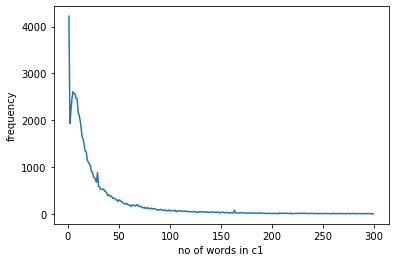

In [23]:
# no of words in c1 vs frequency
# only till 300 as others are mostly zero
plt.xlabel('no of words in c1')
plt.ylabel('frequency')
plt.plot(np.arange(1, 300), freq_arr_c1[1:300])

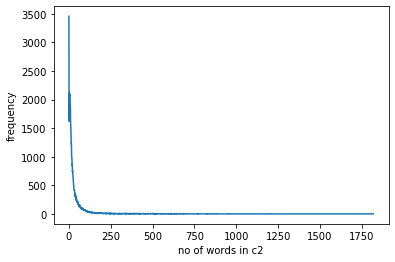

In [24]:
# no of words in c2 vs frequency
# generate frequency array for c2
freq_arr_c2 = [0 for i in range(0, max(c2_word_len)+1)]
for i in c2_word_len:
    freq_arr_c2[i] += 1
    
plt.xlabel('no of words in c2')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c2_word_len)+1), freq_arr_c2[1:])

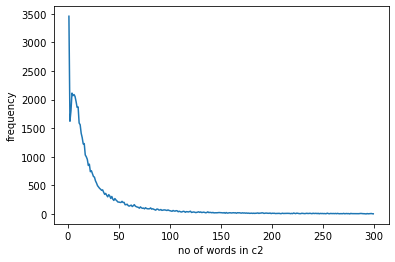

In [56]:
# no of words in c2 vs frequency
# only till 300 as others are mostly zero
plt.xlabel('no of words in c2')
plt.ylabel('frequency')
plt.plot(np.arange(1, 300), freq_arr_c2[1:300])

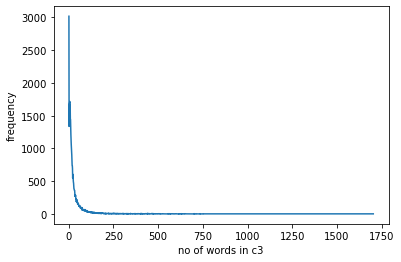

In [26]:
# no of words in c3 vs frequency
# generate frequency array for c3
freq_arr_c3 = [0 for i in range(0, max(c3_word_len)+1)]
for i in c3_word_len:
    freq_arr_c3[i] += 1
    
plt.xlabel('no of words in c3')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c3_word_len)+1), freq_arr_c3[1:])

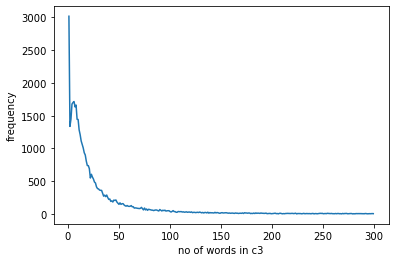

In [57]:
# no of words in c3 vs frequency
# only till 300 as others are mostly zero
plt.xlabel('no of words in c3')
plt.ylabel('frequency')
plt.plot(np.arange(1, 300), freq_arr_c3[1:300])

In [28]:
# Information got:
"""
1. Title cannot exceed 300 words, and using ~25-60 words should be enough
2. Selftext, comments have lots of null values
3. These 4 also contain outliers, exceeding thousands of words
"""
# Insights:
"""
Need a network that can process ~25-60 words if using only title,
if using rest of the cols, need more input capacity
"""
# Actions taken:
"""
As selftext can be considered part of title, lets check where the
concatenation of both stands
"""

'\nAs selftext can be considered part of title, lets check where the\nconcatenation of both stands\n'

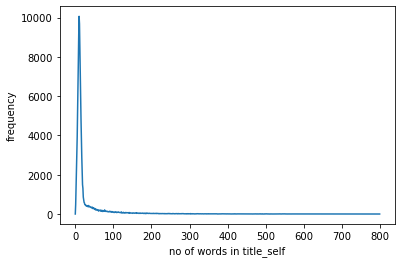

In [29]:
# No of words in title and selftext combined vs frequency

# get combined length for all entries
title_self_word_len = [sum(x) for x in zip(title_word_len, selftext_word_len)]

# generate frequency array for combined length
freq_arr_title_self = [0 for i in range(0, max(title_self_word_len)+1)]
for i in title_self_word_len:
    freq_arr_title_self[i] += 1
    
plt.xlabel('no of words in title_self')
plt.ylabel('frequency')
plt.plot(np.arange(0, 800), freq_arr_title_self[:800])

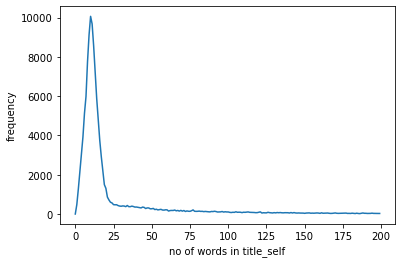

In [30]:
# No of words in combination vs frequency
plt.xlabel('no of words in title_self')
plt.ylabel('frequency')
plt.plot(np.arange(0, 200), freq_arr_title_self[0:200])

In [31]:
# Information got:
"""
1. Adding any column to to title will skew it away from the title
While adding selftext to title can make prediction better, it will
require more resources, or a hybrid approach can be used
Adding comments can help in cases when selftext and title are not enough,
for example 3 words in title and no self text, but problem is 
comments can be unrelated to prediction of flair and can be 'very' long,
thus dominating the input data fed.
"""
# Actions taken:
"""
I'll experiment with different combinations/ truncations of input
While I think I can use a encoder to maybe compress some of the text,
resource requirement while training will increase

Whatever design decision is taken in the end, it will be on these 5 fields
i.e. title, selftext, c1, c2, and c3
I proceed to analyze the relation of these with the labels
"""
# Update: (eda 2)
"""
I will conduct analysis of the especially weak cases. How much can adding
the other columns help when title is of less length
"""

'\nI will conduct analysis of the especially weak cases. How much can adding\nthe other columns help when title is of less length\n'

In [32]:
def three_dec(array):
    return [float(f'{x:.3f}') for x in array]

title mean by flair:  [13.167, 11.157, 10.972, 12.608, 9.616, 10.681, 7.357, 11.545, 9.093, 9.377, 13.295, 13.624]


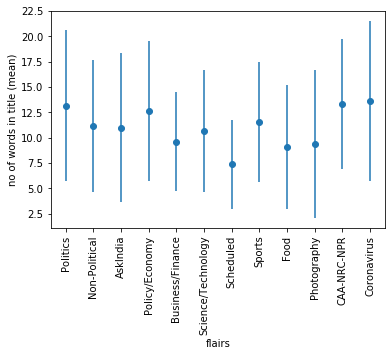

In [33]:
# variation of title length with flair

# generate mean and stds for each flair
title_mean_by_flair = []
title_std_by_flair = []
for i in title_len_by_flair:
    title_mean_by_flair.append(sum(i)/len(i))
    title_std_by_flair.append(np.std(i))
    
plt.xlabel('flairs')
plt.ylabel('no of words in title (mean)')
# plot mean with standard deviation
plt.errorbar(np.arange(12), title_mean_by_flair, title_std_by_flair, linestyle='None', fmt='o')

# plot without std
#plt.errorbar(np.arange(12), title_mean_by_flair, [0 for i in range(12)], linestyle='None', fmt='o')

# rotate labels 90 degrees
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.plot()

# print raw data
print('title mean by flair: ', three_dec(title_mean_by_flair))

In [34]:
# Information got:
"""
Business/Finance, Scheduled, Photography and Food have the least number of words
"""
# Inference:
"""
These categories may suffer due to unavailability of enough words, 
Scheduled seems to be in trouble unless it's titles have some structure
"""
# Action taken:
"""
Look for structure in scheduled
"""

'\nLook for structure in scheduled\n'

In [35]:
# Read some scheduled data points
df[df['flair']=='Scheduled']

,c1,c2,c3,date,date_raw,flair,permalink,selftext,sub_id,title
3,Every time I come to this thread I realise how...,मेरी पूजनीय माताजी और आप सब की बड़ी बहन के आशी...,Goodnight imma cry myself to sleep now,2020-04-10 21:15:03,1586533503,Scheduled,https://www.reddit.com/r/india/comments/fyi8g2...,Beep Boop Bot I am a bot if any problem askawa...,fyi8g2,Late Night Random Discussion Thread
180,How to take important decisions in life Everyo...,I live in a hostel in Kota The students here g...,Disclaimer Sorry if I built a hype and this di...,2020-04-11 21:15:29,1586619929,Scheduled,https://www.reddit.com/r/india/comments/fz7w25...,Beep Boop Bot I am a bot if any problem askawa...,fz7w25,Late Night Random Discussion Thread
254,My friends complaining about running out of da...,Mummy and I are very proud of what we cooked t...,Mere baap ne bachpan me mujhe bade logo ki pep...,2020-04-12 09:15:29,1586663129,Scheduled,https://www.reddit.com/r/india/comments/fzpfrc...,Beep Boop Bot I am a bot if any problem askawa...,fzpfrc,Random Daily Discussion Thread April at AM
390,Education minister of Maharashtra wants to tak...,Suddenly got a high fever,Anyone else feeling these days that their ment...,2020-04-12 21:15:03,1586706303,Scheduled,https://www.reddit.com/r/india/comments/fzyyju...,Beep Boop Bot I am a bot if any problem askawa...,fzyyju,Late Night Random Discussion Thread
449,DD Nostalgia http imgurcomaiNEuX,Today s Submission,Here s my submission for today s art challenge...,2020-04-13 09:15:28,1586749528,Scheduled,https://www.reddit.com/r/india/comments/g0b97p...,Beep Boop Bot I am a bot if any problem askawa...,g0b97p,Random Daily Discussion Thread April at AM
594,My Dadi passed away today at pm she was not we...,Practically everything I remember watching on ...,deleted,2020-04-13 21:15:26,1586792726,Scheduled,https://www.reddit.com/r/india/comments/g0lfy8...,Beep Boop Bot I am a bot if any problem askawa...,g0lfy8,Late Night Random Discussion Thread
639,Led zep and iron maiden are finally on spotify,Red Hot Chili Peppers,Toollateralus,2020-04-14 08:54:09,1586834649,Scheduled,https://www.reddit.com/r/india/comments/g0xwp6...,What is listening to Share and discuss songs p...,g0xwp6,BiWeekly Music Thread
642,This thread is for casual discussion only No p...,Holdmybroccoli http imgurcomawLrgHku,Since I ca nt draw mine here s my cat s Nitamb...,2020-04-14 09:15:26,1586835926,Scheduled,https://www.reddit.com/r/india/comments/g0y7zg...,Beep Boop Bot I am a bot if any problem askawa...,g0y7zg,Random Daily Discussion Thread April at AM
778,This thread is for casual discussion only No p...,Remember when OnePlus phones were affordable V...,Jaan me jaan aagayi bc,2020-04-14 21:50:56,1586881256,Scheduled,https://www.reddit.com/r/india/comments/g18kne...,Sorry for being late Bot did not run today for...,g18kne,Late Night Random Discussion Thread
958,This thread is for casual discussion only No p...,texting back is really really hard sometimes,Come back bunty,2020-04-15 21:15:11,1586965511,Scheduled,https://www.reddit.com/r/india/comments/g1ug3p...,Beep Boop Bot I am a bot if any problem askawa...,g1ug3p,Late Night Random Discussion Thread


In [36]:
# Information got:
"""
They do have structure, most have title Biweekly {}, Weekly {},
Random Daily {}, Late Night Random {}
Also some outliers lie with dates before 2017-12-04, they are either wrongly
tagged, but I visited some of the links, and they do exist till date.
"""
# Inference
"""
Network should easily identify this structure in title, so the problem
is not as big as it was believed earlier
"""
# Action taken:
"""
Investigate the outliers
"""

'\nInvestigate the outliers\n'

In [37]:
# Investigate data points prior to 1 jan 2018
df[(df['flair']=='Scheduled') & (df['date_raw'] <= 1512402101)]

,c1,c2,c3,date,date_raw,flair,permalink,selftext,sub_id,title
144203,Still skinnyfat,Chicken local desi colourful one has its price...,My body is so weird I am and weigh like kgs ar...,2017-12-04 21:11:41,1512402101,Scheduled,https://www.reddit.com/r/india/comments/7hi324...,Trying to see if there is an interest in healt...,7hi324,Weekly Health and Fitness Thread
144551,I started watching The Wire OH MY GOD,Watching Parks and Rec for the first time Did ...,Mindhunter world war in colour,2017-12-03 11:42:23,1512281543,Scheduled,https://www.reddit.com/r/india/comments/7h85pk...,So what is watching of late Discovered any new...,7h85pk,Biweekly moviestvshowsdocumentariespodcasts di...
144882,,,,2017-12-01 21:33:33,1512144213,Scheduled,https://www.reddit.com/r/india/comments/7gvwx0...,,7gvwx0,Beautiful Daughter of Bollywood Actor Aditya P...
144901,How do I improve my coding skills I m in rd ye...,Updated one of my Reddit bot here is the sourc...,As an engineering student in cs what are my op...,2017-12-01 20:29:08,1512140348,Scheduled,https://www.reddit.com/r/india/comments/7gvhg2...,Last week s issue All Threads Every week on Fr...,7gvhg2,Weekly Coders Hackers All Tech related thread
144933,,,,2017-12-01 18:10:31,1512132031,Scheduled,https://www.reddit.com/r/india/comments/7gupv6...,,7gupv6,Cyclone ochki video in kerala
145258,removed,Meet my cat Fritz the incredible sitting cat E...,Scooby was a bit sleepy but says Hi,2017-11-30 11:50:26,1512022826,Scheduled,https://www.reddit.com/r/india/comments/7gkbf0...,Post pictures of your dogs cats goats snakes t...,7gkbf0,Photography thread doggos cats and other pets ...
145334,,,,2017-11-30 01:35:48,1511985948,Scheduled,https://www.reddit.com/r/india/comments/7gg7v6...,,7gg7v6,Avengers Infinity War First Trailer Is Out Now
145486,Arcade Fire Rebellion Lies Indie Opeth Isolati...,Hey everyone I am the guitarist of Cat Kamikaz...,Some of the albums listened last in November B...,2017-11-29 15:13:56,1511948636,Scheduled,https://www.reddit.com/r/india/comments/7gc3gv...,What is listening to this week Share your play...,7gc3gv,BiWeekly Music Thread
145908,Last week I ran my first K after two years of ...,If someone is looking to lose weight i d recom...,These pullups are so darn hard i cant even do ...,2017-11-27 20:45:45,1511795745,Scheduled,https://www.reddit.com/r/india/comments/7fvthf...,Trying to see if there is an interest in healt...,7fvthf,Weekly Health and Fitness Thread
145968,,,,2017-11-27 15:44:19,1511777659,Scheduled,https://www.reddit.com/r/india/comments/7fu7v5...,,7fu7v5,HOT Actress ne kare bina BRA pehene sence HOT ...


In [38]:
# Information got
"""
Posts prior to 1 jan 2018 contain more noise
"""
# Inference
"""
They are ~30 in number so should not affect classifier much
"""

'\nThey are ~30 in number so should not affect classifier much\n'

In [39]:
# Investigate data points of 2018
df[(df['flair'] == 'Scheduled') & (df['date_raw'] <= 1546214400) & (df['date_raw'] >= 1512402101)]

,c1,c2,c3,date,date_raw,flair,permalink,selftext,sub_id,title
70784,Since we are short on sticky thread slot on th...,Guys I have been learning Python for the last ...,I am thinking of installing ubuntu on my lapto...,2018-12-28 20:35:01,1546009501,Scheduled,https://www.reddit.com/r/india/comments/aab18c...,Last week s issue All Threads Every week on Fr...,aab18c,Weekly Coders Hackers All Tech related thread
70808,,,,2018-12-28 18:19:06,1546001346,Scheduled,https://www.reddit.com/r/india/comments/aaa1g3...,,aaa1g3,Jaspal Group Pulley and V Belts Manufacturer a...
71572,Ex told she slept with men over the last week ...,Pornstar recommendations,,2018-12-23 14:33:21,1545555801,Scheduled,https://www.reddit.com/r/india/comments/a8tbqy...,Post your questions related to sax and also te...,a8tbqy,NSFW Weekly Sax Thread
71759,,,,2018-12-21 21:31:27,1545408087,Scheduled,https://www.reddit.com/r/india/comments/a8bcu8...,Every alternate Friday at pm I will post this ...,a8bcu8,Biweekly career and hiring thread
71821,Weekend means DotA,gAmE CaLlEd LiFe DotA I am addicted Pls help,Polytopia This game is good,2018-12-21 15:21:50,1545385910,Scheduled,https://www.reddit.com/r/india/comments/a88htj...,Let us use this thread to discuss games that w...,a88htj,What games are you playing this weekend
71900,,,,2018-12-21 04:41:25,1545347485,Scheduled,https://www.reddit.com/r/india/comments/a83rch...,,a83rch,The Logical Indian Letstalk slavery in India
72101,Coldmess by Prateek Kuhad,One of these days I am going to cut you into l...,deleted,2018-12-19 19:02:41,1545226361,Scheduled,https://www.reddit.com/r/india/comments/a7mfra...,What is listening to this week Share your play...,a7mfra,BiWeekly Music Thread
72414,,,,2018-12-17 23:03:32,1545068012,Scheduled,https://www.reddit.com/r/india/comments/a71w0r...,,a71w0r,How to travel in low budget at hilly regions s...
72777,,,,2018-12-15 12:52:50,1544858570,Scheduled,https://www.reddit.com/r/india/comments/a6dd6a...,,a6dd6a,Sandeep Fountains — Swimming Pool Manufacturer...
72846,Recently made a firefox plugin to allow users ...,Which Indian government sites publish good qua...,First time in my life I have written lines of ...,2018-12-14 20:26:25,1544799385,Scheduled,https://www.reddit.com/r/india/comments/a65hnz...,Last week s issue All Threads Every week on Fr...,a65hnz,Weekly Coders Hackers All Tech related thread


In [40]:
# Information got:
"""
Less noise as compared to 2017
"""
# Inference:
"""
Classifying scheduled based on just title should be okay
"""

'\nClassifying scheduled based on just title should be okay\n'

selftext mean by flair:  [189.311, 158.345, 96.663, 257.349, 139.698, 118.603, 55.742, 84.861, 106.143, 62.407, 109.0, 168.676]


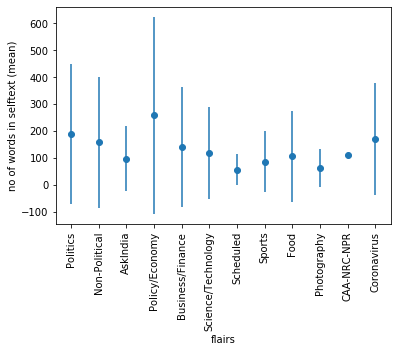

In [41]:
# variation of selftext length with flairs
# zero length selftexts are ignored, as these push nearly all means to zero

# generate mean and std for each flair
selftext_mean_by_flair = []
selftext_std_by_flair = []
for i in selftext_len_by_flair:
    without_zero = []
    
    # iterate over a flair
    for j in i:
        if j != 0:
            without_zero.append(j)
    
    # in eda-1 some has no selftext, 
    # this prevents division by zero, 
    # and sets mean and std to zero 
    # for such flairs
    if len(without_zero) != 0:
        selftext_mean_by_flair.append(sum(without_zero)/len(without_zero))
        selftext_std_by_flair.append(np.std(without_zero))
    else:
        selftext_mean_by_flair.append(0)
        selftext_std_by_flair.append(0)

plt.xlabel('flairs')
plt.ylabel('no of words in selftext (mean)')

# plot means and std
plt.errorbar(np.arange(12), selftext_mean_by_flair, selftext_std_by_flair, linestyle='None', fmt='o')

# plot without std
#plt.errorbar(np.arange(12), selftext_mean_by_flair, [0 for i in range(12)], linestyle='None', fmt='o')

# rotate flairs by 90 degrees and plot
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.plot()

# print raw data
print('selftext mean by flair: ', three_dec(selftext_mean_by_flair))

In [42]:
# Information got:
"""
Scheduled improves, Food and Photography get boosted
But note that this is ignores empty fields, so this
graph is very optimistic
"""

'\nScheduled improves, Food and Photography get boosted\nBut note that this is ignores empty fields, so this\ngraph is very optimistic\n'

title selftext mean by flair:  [27.047, 32.492, 77.38, 40.502, 17.789, 21.358, 41.802, 16.987, 23.21, 10.162, 15.773, 49.324]
title mean by flair:  [13.167, 11.157, 10.972, 12.608, 9.616, 10.681, 7.357, 11.545, 9.093, 9.377, 13.295, 13.624]


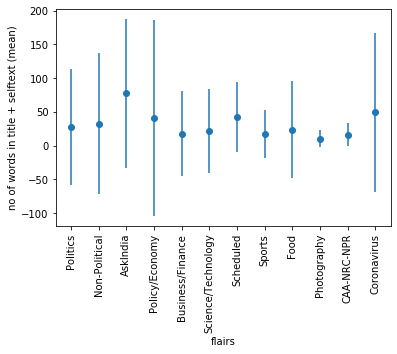

In [43]:
# Variation of title + selftext length by flair

# hold mean and stds for each flair
title_selftext_mean_by_flair = []
title_selftext_std_by_flair = []

# generate combined length by flair
title_selftext_len_by_flair = []
for i in range(len(valid_flairs)):
    title_selftext_len_by_flair.append(
        [sum(x) for x in zip(title_len_by_flair[i], selftext_len_by_flair[i])]
    )

# hold mean and std by flair
for i in title_selftext_len_by_flair:
    title_selftext_mean_by_flair.append(sum(i)/len(i))
    title_selftext_std_by_flair.append(np.std(i))
    
    
plt.xlabel('flairs')
plt.ylabel('no of words in title + selftext (mean)')

# plot mean with standard deviation 
plt.errorbar(np.arange(12), title_selftext_mean_by_flair, title_selftext_std_by_flair, linestyle='None', fmt='o')

# plot without std
#plt.errorbar(np.arange(12), title_selftext_mean_by_flair, [0 for i in range(12)], linestyle='None', fmt='o')

# rotate labels 90 degrees
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.plot()

# print raw data
print('title selftext mean by flair: ', three_dec(title_selftext_mean_by_flair))
print('title mean by flair: ', three_dec(title_mean_by_flair))

In [44]:
# Information got:
"""
The numbers increase, but not too much like the previous
biased plot
"""
# Action taken:
"""
Need to see both together to see what advantage do we get
"""

'\nNeed to see both together to see what advantage do we get\n'

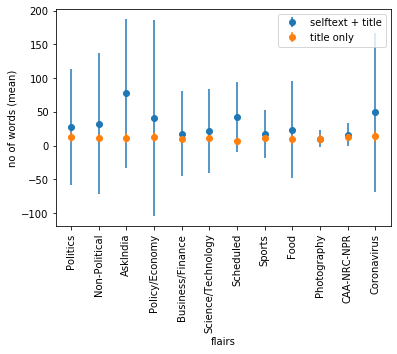

In [45]:
# Plot selftext + title, title vs no of words 
# in same with errorbar
plt.xlabel('flairs')
plt.ylabel('no of words (mean)')
plt.errorbar(np.arange(12), title_selftext_mean_by_flair, title_selftext_std_by_flair, linestyle='None', fmt='o', label='selftext + title')
plt.errorbar(np.arange(12), title_mean_by_flair, title_std_by_flair, linestyle='None', fmt='o', label='title only')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.show()

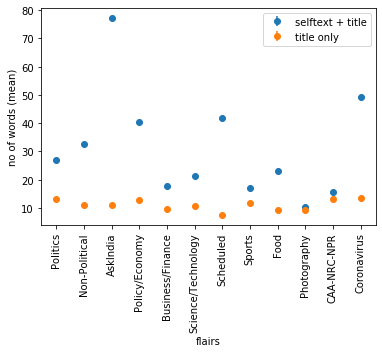

In [46]:
# Plot same without std to exaggerate 
plt.xlabel('flairs')
plt.ylabel('no of words (mean)')
plt.errorbar(np.arange(12), title_selftext_mean_by_flair, np.zeros_like(title_selftext_std_by_flair), linestyle='None', fmt='o', label='selftext + title')
plt.errorbar(np.arange(12), title_mean_by_flair, np.zeros_like(title_std_by_flair), linestyle='None', fmt='o', label='title only')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.show()

In [47]:
# Information got:
"""
Photography and caa-rnc-npr do not get boosted much, while some
improvement in business/finance, sports and food
"""
# Inference:
"""
Business has lots of data points (10 k), so situation is not as bad
Scheduled has structure, despite less data points, this should be picked by classifier easily
Photography, caa-nrc-npr don't gain much from adding selftext anyway, as shown by above plot
Sports is okay considering the title length
Food gets boosted by adding selftext, so maybe it can benefit
"""

"\nBusiness has lots of data points (10 k), so situation is not as bad\nScheduled has structure, despite less data points, this should be picked by classifier easily\nPhotography, caa-nrc-npr don't gain much from adding selftext anyway, as shown by above plot\nSports is okay considering the title length\nFood gets boosted by adding selftext, so maybe it can benefit\n"

In [48]:
# This analysis of scheduled flair stirred curiousity
# in caa-nrc-npr, which is a minority by frequency
# Read some scheduled data points
df[df['flair']=='CAA-NRC-NPR']

,c1,c2,c3,date,date_raw,flair,permalink,selftext,sub_id,title
15,Creepy but nice,I legit smiled back lol,Behenchod Flair ka majak bana diye ho bilkul,2020-04-10 22:13:09,1586536989,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/fyjdoy...,,fyjdoy,Marriott Ahmedabad trying to spread smiles ami...
231,No is the deadline,yes it reduces time for naturalization of citi...,,2020-04-12 03:02:59,1586640779,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/fzjlcv...,Quoting from the Wikipedia article on CAA The ...,fzjlcv,Does CAA grant citizenship to future immigrant...
299,According to Alok Kumar Joint Commissioner of ...,,,2020-04-12 13:03:24,1586676804,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/fzseaa...,,fzseaa,Jamia Coordination Committee member arrested i...
973,So this is what Amit shah has been upto,,,2020-04-15 22:32:39,1586970159,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/g1vz0p...,,g1vz0p,Delhi riots More than members of Jamia coordin...
1013,This is how emergency provisions create textbo...,Priorities,In cases of JNU attacks dalli police keeps mum...,2020-04-16 09:04:12,1587008052,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/g27adr...,,g27adr,Amid lockdown Delhi Police target and arrest a...
1426,Wait wasn ’ t that speech given after th December,If what he said is sedition then this country ...,One sentence and his life is ruined,2020-04-18 12:16:17,1587192377,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/g3j57d...,,g3j57d,Sharjeel Imam chargesheeted for giving seditio...
1490,Delhi police charged former JNU student Sharje...,Student protest turned into a riot by Dalli Po...,,2020-04-18 17:06:08,1587209768,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/g3m4i2...,,g3m4i2,Delhi Police Slap Sedition Charge Against Shar...
1622,“ Instead of engaging with the protestors the ...,Not surprising It s highly likely that people ...,,2020-04-19 10:22:51,1587271971,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/g41u41...,,g41u41,Unending WitchHunt of Muslims Eminent Citizens...
2104,,,,2020-04-21 19:58:36,1587479316,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/g5g7hh...,,g5g7hh,Delhi violence Police books Jamia students und...
2567,At least use different news sources We are pro...,Says New York Times the newspaper that made fu...,,2020-04-06 11:02:21,1586151141,CAA-NRC-NPR,https://www.reddit.com/r/india/comments/fvsxwi...,,fvsxwi,Modi Denies India Is Targeting Muslims We Foun...


In [49]:
# Information got:
"""
It can be seen that they have many common words, like Jamia, Shaheen Bagh, Telangana, Protest etc..
so there is some structure in the posts.
"""
# Inference:
"""
The challenge is for the classifier to catch this despite little data.
"""

'\nThe challenge is for the classifier to catch this despite little data.\n'

In [50]:
# keep only alphabets
def process_text(text):
    tokens = nltk.tokenize.word_tokenize(text)
    words = [x for x in tokens if x.isalpha()]
    text = ' '.join(words)
    return text

In [51]:
# Write out data (delete manually beforehand)
with open('data5_cleaned.txt', 'a') as f:
    for index, row in df.iterrows():
        f.write(row['flair'])
        f.write('\n')
        f.write(process_text(row['title']))
        f.write('\n')

In [53]:
# Write out data in sorted format:
with open('data5_sort_titles.txt', 'a') as f:
    for i in valid_flairs:
        df2 = df[df['flair'] == i]
        for index,row in df2.iterrows():
            #f.write(row['flair'])
            #f.write('\n')
            f.write(process_text(row['title']))
            f.write('\n')

In [400]:
# write out data with N/5 as validation and 4N/5 as train (acc to Dr. Yaser)
# I'll do this by first shuffling the dataset to prevent 
# some kind of bias by date that can possibly make the validation 
# and training sets too different
# Then I'll just write to 2 separate files according to count

# Update: N/5 as validation, N/10 as test, 7N/10 as train

# Shuffle dataset and reset index 
# Note that random seed is not set, different splits each time
df = df.sample(frac=1).reset_index(drop=True)


# get no of rows for each label to be present in validation, test sets
label_count_validation = [x//5 for x in label_count]
label_count_test = [(x)//10 for x in label_count]
print('label count validation: ', label_count_validation)
print('label count test: ', label_count_test)

# hold written out counts for validation and test
label_count_curr = [0 for x in label_count]
label_count_curr_test = [0 for x in label_count]

# get label counts for train
label_count_train = [0 for x in range(len(label_count))]
for i in range(len(label_count)):
        label_count_train[i] = label_count[i] - label_count_validation[i] - label_count_test[i]

print('label count train: ', label_count_train)
print('label count total: ', label_count)

# To control whether to actually write out data
# Set to 1 to writeout data (after deleting existing files)
switch = 1
if switch == 1:
    # iterate over whole dataset
    for index,row in df.iterrows():
        cur_index = index_for_flair[row['flair']]
        
        # write to validation set if not enough points for current flair
        if label_count_curr[cur_index] < label_count_validation[cur_index]:
            with open('data5_valid.txt', 'a') as f:
                f.write(row['flair'])
                f.write('\n')
                f.write(process_text(row['title']))
                f.write('\n')
                label_count_curr[cur_index] += 1
        
        # write to test set if not enough points for current flair
        elif label_count_curr_test[cur_index] < label_count_test[cur_index]:
            with open('data5_test.txt', 'a') as f:
                f.write(row['flair'])
                f.write('\n')
                f.write(process_text(row['title']))
                f.write('\n')
                label_count_curr_test[cur_index] += 1
        
        # write to train set otherwise
        else:
            with open('data5_train.txt', 'a') as f:
                f.write(row['flair'])
                f.write('\n')
                f.write(process_text(row['title']))
                f.write('\n')
       

label count validation:  [7567, 7012, 3839, 1533, 2023, 1293, 162, 561, 315, 429, 8, 618]
label count test:  [3783, 3506, 1919, 766, 1011, 646, 81, 280, 157, 214, 4, 309]
label count train:  [26486, 24543, 13437, 5368, 7084, 4526, 571, 1966, 1107, 1504, 32, 2163]
label count total:  [37836, 35061, 19195, 7667, 10118, 6465, 814, 2807, 1579, 2147, 44, 3090]


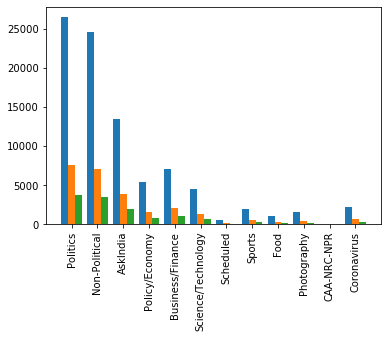

In [401]:
# Plot bar graph of data split
# subcategorybar function taken from: https://stackoverflow.com/a/48158449

def subcategorybar(valid_flairs, vals, width=0.8):
    n = len(vals)
    range_flairs = np.arange(len(valid_flairs))
    for i in range(n):
        plt.bar(range_flairs - width/2. + i/float(n)*width, vals[i],
                width=width/float(n), align='edge')
    plt.xticks(range_flairs, valid_flairs, rotation=90)

subcategorybar(valid_flairs, [label_count_train, label_count_validation, label_count_test])
plt.show()